# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama: Keisya Anazwa Octa Reviandy**
- **Email: keisyanazwa2004@gmail.com**
- **ID Dicoding: keisyanazwa**

## Menentukan Pertanyaan Bisnis

- Produk apa saja kah yang paling banyak dipesan dan produk apa saja kah yang paling sedikit dipesan?
- Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [249]:
path_dataset = "data/olist_customers_dataset.csv"
customer_df = pd.read_csv(path_dataset)
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [250]:
path_dataset = "data/olist_geolocation_dataset.csv"
geolocation_df = pd.read_csv(path_dataset)
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [251]:
path_dataset = "data/olist_order_items_dataset.csv"
order_items_df = pd.read_csv(path_dataset)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [252]:
path_dataset = "data/olist_order_payments_dataset.csv"
order_payments_df = pd.read_csv(path_dataset)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [253]:
path_dataset = "data/olist_order_reviews_dataset.csv"
order_review_df = pd.read_csv(path_dataset)
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [254]:
path_dataset = "data/olist_orders_dataset.csv"
orders_df = pd.read_csv(path_dataset)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [255]:
path_dataset = "data/olist_products_dataset.csv"
products_df = pd.read_csv(path_dataset)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [256]:
path_dataset = "data/olist_sellers_dataset.csv"
sellers_df = pd.read_csv(path_dataset)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [257]:
path_dataset = "data/product_category_name_translation.csv"
product_category_name_translation_df = pd.read_csv(path_dataset)
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [258]:
joined_df1=pd.merge(
    left = order_items_df,
    right = order_payments_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
print('Jumlah baris dan kolom joined_df1 : ', joined_df1.shape)
joined_df1.head()

Jumlah baris dan kolom joined_df1 :  (117604, 11)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [259]:
joined_df2 = pd.merge(
    pd.merge(
        customer_df, orders_df,
        how = "left", on = 'customer_id'
    ),
    pd.merge(
        order_items_df, sellers_df,
        how = "left", on = 'seller_id'
    ),
    how = "left",
    on = "order_id"
)
print ('Jumlah baris dan kolom joined_df2 : ', joined_df2.shape)
joined_df2.head()

Jumlah baris dan kolom joined_df2 :  (113425, 21)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


**Insight:**
- Dari data di atas bisa kita simpulkan bahwa data gabungan dari Order Items dan Order Payments memiliki 117604 baris dan 11 kolom.
- Dari data di atas bisa kita simpulkan bahwa data gabungan dari Customer, Orders, Order Items, dan Sellers memiliki 113425 baris dan 21 kolom.

### Assessing Data

In [260]:
customer_df = pd.read_csv("data/olist_customers_dataset.csv")
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [261]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [262]:
print("Jumlah duplikasi : ", customer_df.duplicated().sum())
customer_df.describe()

Jumlah duplikasi :  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [263]:
geolocation_df = pd.read_csv("data/olist_geolocation_dataset.csv")
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [264]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [265]:
print("Jumlah duplikasi : ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi :  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [266]:
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [267]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [268]:
print("Jumlah duplikasi : ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [269]:
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [270]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [271]:
print("Jumlah duplikasi : ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi :  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [272]:
order_review_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [273]:
order_review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [274]:
print("Jumlah duplikasi : ", order_review_df.duplicated().sum())
order_review_df.describe()

Jumlah duplikasi :  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [275]:
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [276]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [277]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [278]:
products_df = pd.read_csv("data/olist_products_dataset.csv")
products_df.info()
products_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [279]:
print("Jumlah duplikasi : ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [280]:
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
sellers_df.info()
sellers_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [281]:
print("Jumlah duplikasi : ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [282]:
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_df.info()
product_category_name_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [283]:
print("Jumlah duplikasi : ", product_category_name_df.duplicated().sum())
product_category_name_df.describe()

Jumlah duplikasi :  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Dari data di atas bisa kita simpulkan bahwa data Geolocation memiliki 261831 jumlah duplicate data sehingga perlu di lakukan cleaning.
- Dari data di atas bisa kita simpulkan bahwa data Order Review, Orders, Products masih memiliki Missing Value.

### Cleaning Data

In [284]:
geolocation_df.drop_duplicates(inplace=True)

In [285]:
print("Jumlah duplikasi : ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi :  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [286]:
order_review_df[order_review_df.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [287]:
order_review_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [288]:
order_review_df[order_review_df.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [289]:
order_review_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                        230
Bom                                                                                                                              189
muito bom                                                                                                                        122
bom                                                                                                                              107
Recomendo                                                                                                                        100
                                                                                                                                ... 
para este produto recebi de acordo com a compra realizada!                                                                         1
Entregou dentro do prazo. O produto chegou em 

In [290]:
order_review_df.fillna(value="Prefer not to say", inplace=True)
order_review_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [291]:
orders_df[orders_df.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [292]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-12-05 10:30:42    7
2018-02-06 05:31:52    7
2017-11-07 07:30:38    7
2017-11-07 07:30:29    7
                      ..
2017-10-02 08:56:53    1
2017-06-08 02:45:24    1
2017-07-05 17:43:48    1
2018-05-25 17:15:21    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [293]:
orders_df[orders_df.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [294]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2017-08-18 16:42:51     1
2017-12-05 20:58:57     1
2017-10-03 20:26:19     1
2017-06-08 14:03:29     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [295]:
orders_df[orders_df.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [296]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 19:36:48    3
2018-05-14 20:02:44    3
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-07-24 21:36:42    3
                      ..
2017-10-06 16:58:25    1
2017-06-19 19:19:30    1
2017-07-19 22:10:03    1
2018-06-04 23:54:32    1
2017-11-21 17:06:59    1
Name: count, Length: 95664, dtype: int64

In [297]:
orders_df.fillna(value="Prefer not to say", inplace=True)
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [298]:
products_df[products_df.product_category_name.isnull()]
products_df[products_df.product_name_lenght.isnull()]
products_df[products_df.product_description_lenght.isnull()]
products_df[products_df.product_photos_qty.isnull()]
products_df[products_df.product_weight_g.isnull()]
products_df[products_df.product_length_cm.isnull()]
products_df[products_df.product_height_cm.isnull()]
products_df[products_df.product_width_cm.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
products_df.product_category_name.value_counts()
products_df.product_name_lenght.value_counts()
products_df.product_description_lenght.value_counts()
products_df.product_photos_qty.value_counts()
products_df.product_weight_g.value_counts()
products_df.product_length_cm.value_counts()
products_df.product_height_cm.value_counts()
products_df.product_width_cm.value_counts()

product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
118.0       1
97.0        1
77.0        1
104.0       1
Name: count, Length: 95, dtype: int64

In [300]:
products_df.fillna(value="Prefer not to say", inplace=True)
products_df.isnull().sum()

C:\Users\KEISYA ANAZWA OCTA R\AppData\Local\Temp\ipykernel_30756\841205057.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Prefer not to say' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="Prefer not to say", inplace=True)


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Dari data di atas menunjukkan bahwa kita sudah melakukan Cleaning data sehingga Duplicate data pada data Geolocation menjadi 0.
- Dari data di atas menunjukkan bahwa kita sudah melakukan Cleaning data sehingga Missing Value pada data Order Review, Orders, Products menjadi 0.

## Exploratory Data Analysis (EDA)

### Explore ...

In [301]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [302]:
order_items_df.groupby(by="order_item_id").agg({
    "order_id" : "nunique",
    "price": ["max", "min", ]
})

order_id    price      
               nunique      max   min
order_item_id                        
1                98666  6735.00  0.85
2                 9803  2299.95  0.85
3                 2287  1790.00  1.20
4                  965  1790.00  1.20
5                  460  1680.00  1.20
6                  256  1680.00  1.20
7                   58  1680.00  1.20
8                   36  1680.00  1.20
9                   28   284.99  1.20
10                  25   284.99  1.20
11                  17   179.99  1.20
12                  13   108.00  1.20
13                   8   100.00  1.20
14                   7   100.00  1.20
15                   5   100.00  1.20
16                   3   100.00  1.20
17                   3   100.00  1.20
18                   3   100.00  1.20
19                   3   100.00  1.20
20                   3   100.00  1.20
21                   1     7.80  7.80

In [303]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,Prefer not to say,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [304]:
products_df.sort_values(by="product_category_name", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6509,59cca754c20b7b0322b24dab95a81be5,utilidades_domesticas,55.0,858.0,1.0,6950.0,35.0,30.0,35.0
24374,c4a1c4638fa9e2e4861d141d6e0259e7,utilidades_domesticas,26.0,52.0,6.0,50.0,53.0,8.0,27.0
24229,727017cd91a0361b8ae4cfcff15e9682,utilidades_domesticas,45.0,207.0,1.0,1200.0,19.0,22.0,19.0
2139,e31c5933157c3e4134a0f536f7bcc14e,utilidades_domesticas,60.0,185.0,2.0,525.0,25.0,28.0,25.0
24211,985d0e44eb77bf7ea235ed88dbec3936,utilidades_domesticas,58.0,188.0,5.0,3900.0,35.0,20.0,35.0
...,...,...,...,...,...,...,...,...,...
7313,a8cb589d0aa5e6308a8fcf133ecca711,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,990.0,18.0,27.0,17.0
4961,fcde1899043318107d8f0ae043f69bc3,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,400.0,35.0,7.0,12.0
12595,b0645512783cc56c9510f08e90a40ede,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,300.0,20.0,5.0,25.0
4951,45a15b38cc3c0514717a1de673c6193c,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,250.0,17.0,8.0,13.0


In [305]:
order_items_products_df = pd.merge(
    left = order_items_df,
    right = products_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [114]:
order_items_products_df.groupby(by="product_category_name").agg({
    "product_id" : "nunique",
    "price": ["min", "max"]
})

product_id  price         
                             nunique    min      max
product_category_name                               
Prefer not to say                610   3.00  3980.00
agro_industria_e_comercio         74  12.99  2990.00
alimentos                         82   9.99   274.99
alimentos_bebidas                104   6.50   699.90
artes                             55   3.50  6499.00
...                              ...    ...      ...
sinalizacao_e_seguranca           93   4.50   740.00
tablets_impressao_imagem           9  14.90   889.99
telefonia                       1134   5.00  2428.00
telefonia_fixa                   116   6.00  1790.00
utilidades_domesticas           2335   3.06  6735.00

[74 rows x 3 columns]

In [104]:
order_items_products = order_items_products_df.groupby(by="product_category_name").agg(num_of_order = ('product_id','count'), sum_order_value = ('price', 'sum')).reset_index()
order_items_products.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)

,product_category_name,num_of_order,sum_order_value
14,cama_mesa_banho,11115,1036988.68
12,beleza_saude,9670,1258681.34
33,esporte_lazer,8641,988048.97
55,moveis_decoracao,8334,729762.49
45,informatica_acessorios,7827,911954.32
73,utilidades_domesticas,6964,632248.66
67,relogios_presentes,5991,1205005.68
71,telefonia,4545,323667.53
41,ferramentas_jardim,4347,485256.46
9,automotivo,4235,592720.11


In [105]:
order_items_products.sort_values('num_of_order', ascending=True).head(10)

,product_category_name,num_of_order,sum_order_value
68,seguros_e_servicos,2,283.29
38,fashion_roupa_infanto_juvenil,8,569.85
61,pc_gamer,9,1545.95
18,cds_dvds_musicais,14,730.00
47,la_cuisine,14,2054.99
66,portateis_cozinha_e_preparadores_de_alimentos,15,3968.53
5,artes_e_artesanato,24,1814.01
36,fashion_esporte,30,2119.51
16,casa_conforto_2,30,760.27
42,flores,33,1110.04


In [106]:
order_items_products.sort_values('sum_order_value', ascending=False).head(10)

,product_category_name,num_of_order,sum_order_value
12,beleza_saude,9670,1258681.34
67,relogios_presentes,5991,1205005.68
14,cama_mesa_banho,11115,1036988.68
33,esporte_lazer,8641,988048.97
45,informatica_acessorios,7827,911954.32
55,moveis_decoracao,8334,729762.49
27,cool_stuff,3796,635290.85
73,utilidades_domesticas,6964,632248.66
9,automotivo,4235,592720.11
41,ferramentas_jardim,4347,485256.46


In [178]:
order_items_products.sort_values('sum_order_value', ascending=True).head(10)

,product_category_name,num_of_order,sum_order_value
68,seguros_e_servicos,2,283.29
38,fashion_roupa_infanto_juvenil,8,569.85
18,cds_dvds_musicais,14,730.00
16,casa_conforto_2,30,760.27
42,flores,33,1110.04
61,pc_gamer,9,1545.95
43,fraldas_higiene,39,1567.59
5,artes_e_artesanato,24,1814.01
47,la_cuisine,14,2054.99
36,fashion_esporte,30,2119.51


In [235]:
sellers_df.describe(include="all")

,seller_city,seller_id
count,611,611.000000
unique,611,NaN
top,vicente de carvalho,NaN
freq,1,NaN
mean,NaN,5.065466
std,NaN,29.383875
min,NaN,1.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,3.000000


In [229]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [230]:
sellers_order_items_df = pd.merge(
    left = sellers_df,
    right = order_items_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
sellers_order_items_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [240]:
sellers_in_cities = sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_cities.head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [241]:
sellers_in_states = sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_states.head(10)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


**Insight:**
- Dari data di atas kita bisa mengetahui bahwa cama_mesa_banho merupakan barang yang paling banyak di pesan walaupun bukan yang memiliki jumlah nilai harga tertinggi dan barang yang paling sedikit di pesan adalah seguros_e_servicos.
- Dari data di atas kita bisa mengetahui bahwa beleza_saude merupakan barang yang memiliki jumlah nilai harga tertinggi dan yang memiliki jumlah nilai harga paling rendah adalah seguros_e_servicos.
- Dari data di atas kita bisa mengetahui bahwa Penjual paling banyak berasal dari kota sao paulo dan Penjual paling banyak berdasarkan Negara berasal dari Negara SP

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja kah yang paling banyak dipesan dan produk apa saja kah yang paling sedikit dipesan?

C:\Users\KEISYA ANAZWA OCTA R\AppData\Local\Temp\ipykernel_30756\280265369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\KEISYA ANAZWA OCTA R\AppData\Local\Temp\ipykernel_30756\280265369.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


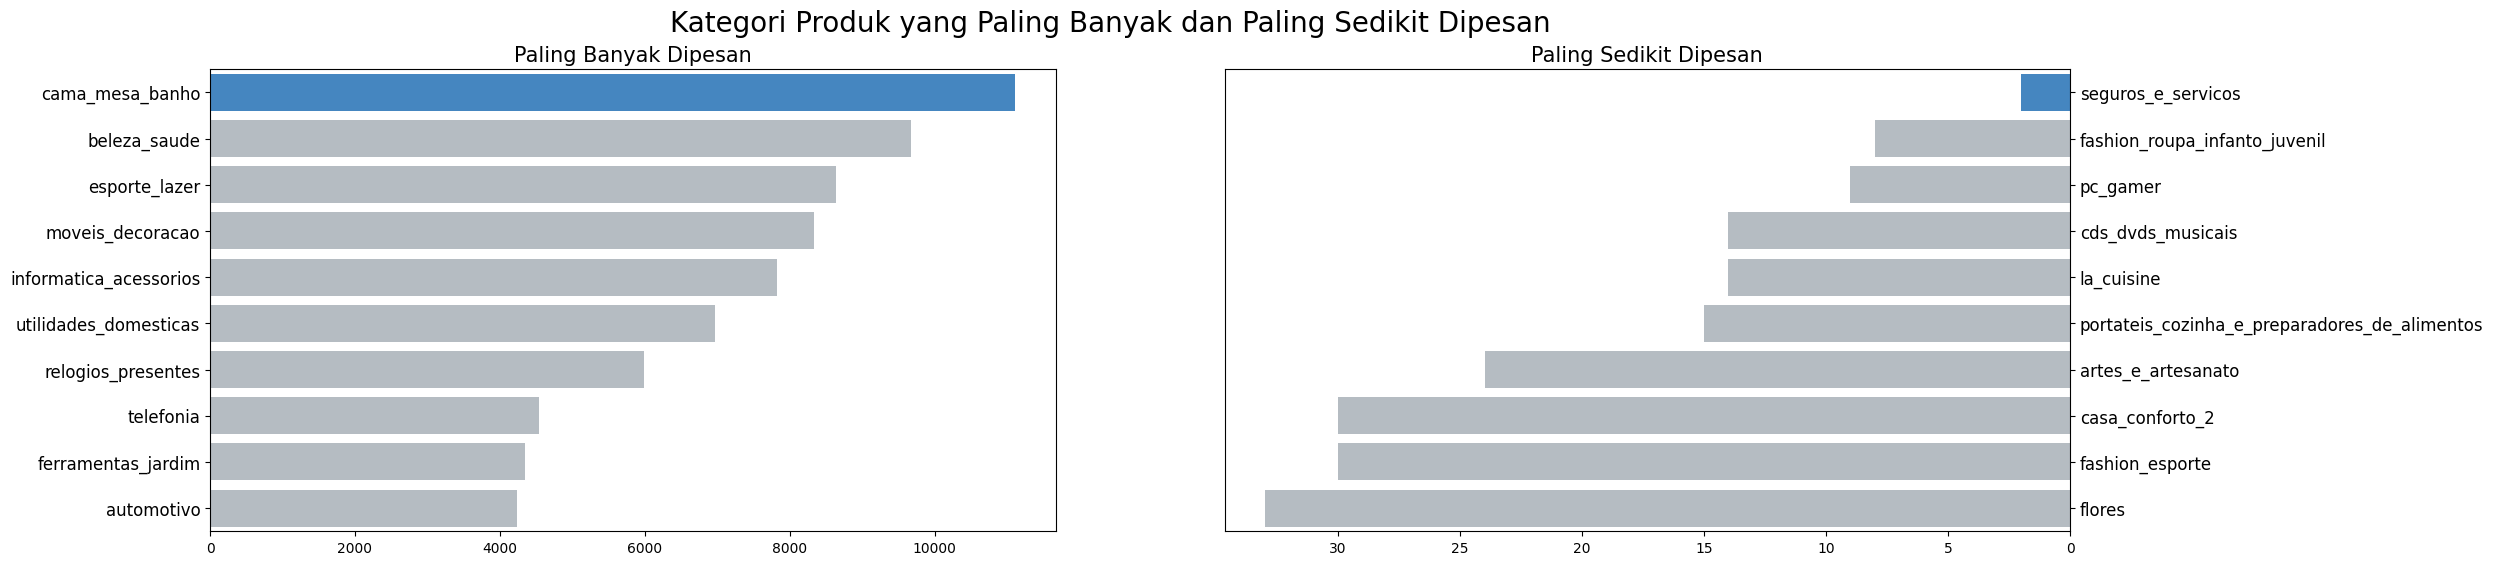

In [320]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="num_of_order",
    y="product_category_name",
    data = order_items_products.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10),
    palette=colors,
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Paling Banyak Dipesan", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="num_of_order",
    y="product_category_name",
    data = order_items_products.sort_values(by=['num_of_order','sum_order_value'], ascending=True).head(10),
    palette=colors,
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Paling Sedikit Dipesan", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk yang Paling Banyak dan Paling Sedikit Dipesan", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian?

C:\Users\KEISYA ANAZWA OCTA R\AppData\Local\Temp\ipykernel_30756\1971478465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "seller_city", y = "seller_id", data = sellers_in_cities.head(10), palette=colors, ax=ax[0])
C:\Users\KEISYA ANAZWA OCTA R\AppData\Local\Temp\ipykernel_30756\1971478465.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_state", y="seller_id", data= sellers_in_states.head(10), palette=colors, ax=ax[1])


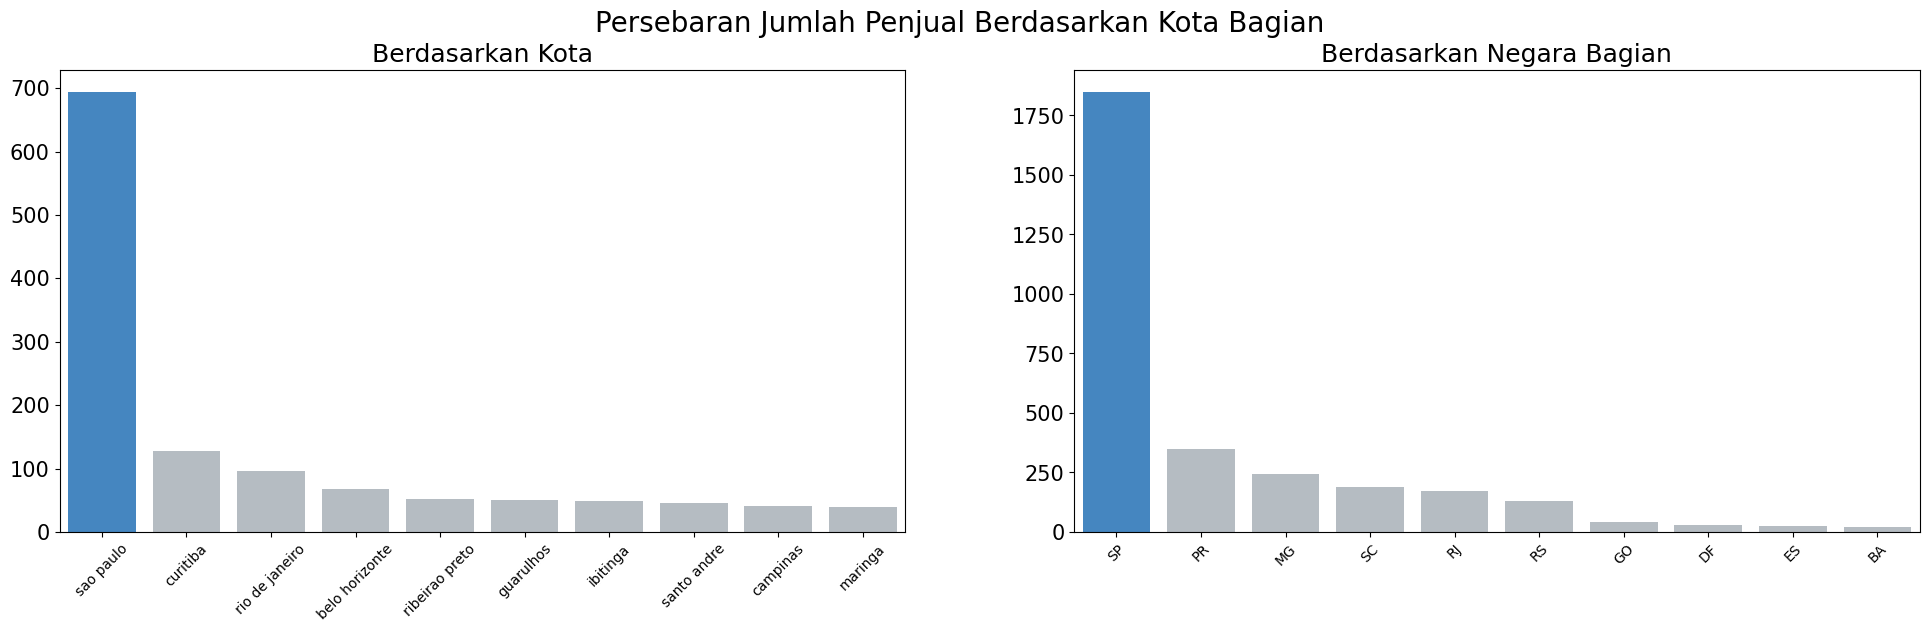

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "seller_city", y = "seller_id", data = sellers_in_cities.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="seller_state", y="seller_id", data= sellers_in_states.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Penjual Berdasarkan Kota Bagian", fontsize=20)
plt.show()

## Conclusion

- Dari data di atas kita bisa menjawab Pertanyaan 1 : Produk apa saja kah yang paling banyak dipesan dan produk apa saja kah yang paling sedikit dipesan? yaitu produk yang paling banyak dipesan adalah Cama_mesa_banho dengan total pemesanan 11115 dan Produk paling sedikit di pesan adalah Seguros_e_servicos dengan total pemesanan 2.
- Dari data di atas kita bisa menjawab Pertanyaan 2 : Bagaimana penyebaran dari penjual berdasarkan kota dan negara bagian? yaitu Penjual paling banyak berdasarkan Kota berasal dari Kota Sao Paulo berjumlah 694 dan penyebaran Penjual paling banyak berdasarkan Negara berasal dari negara SP berjumlah 1849